# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [74]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.utils import resample

In [75]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

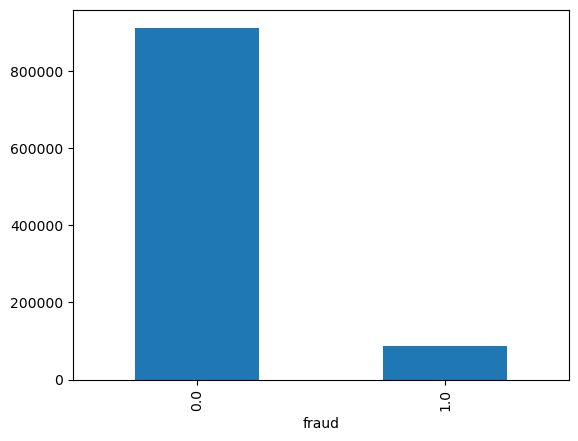

In [76]:
# The data is very imbalanced as shown by the plot.
survived = fraud["fraud"].value_counts()
survived.plot(kind="bar")
plt.show()

In [77]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_overfeed = log_reg.score(X_train, y_train)
log_reg_acc = log_reg.score(X_test, y_test)
log_reg_pred = log_reg.predict(X_test)
log_reg_rec_prec = classification_report(y_test, log_reg_pred)
print("Overfeed:",log_reg_overfeed, "Accuracy:", log_reg_acc, "Difference: ",log_reg_overfeed-log_reg_acc, "\n", log_reg_rec_prec)

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Overfeed: 0.18025466666666667 Accuracy: 0.179564 Difference:  0.0006906666666666728 
               precision    recall  f1-score   support

         0.0       1.00      0.10      0.18    228232
         1.0       0.10      1.00      0.18     21768

    accuracy                           0.18    250000
   macro avg       0.55      0.55      0.18    250000
weighted avg       0.92      0.18      0.18    250000



In [78]:
# OVERSAMPLING
fraud_fraud = fraud[fraud["fraud"] == 1]
fraud_legit = fraud[fraud["fraud"] == 0]
sample = resample(fraud_fraud, 
                replace=True,
                n_samples = len(fraud_legit),
                random_state= 0)
trainsample = pd.concat([sample, fraud_legit])

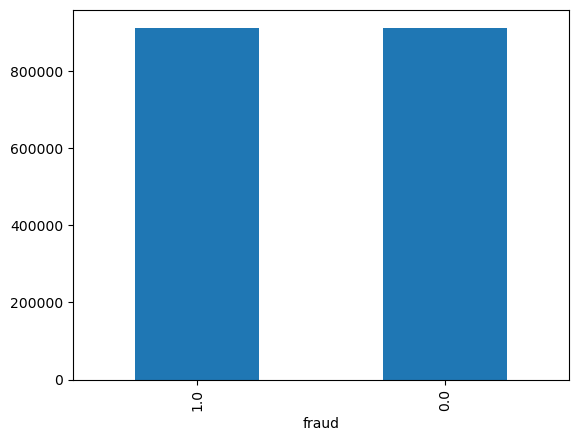

In [79]:
sample_plot = trainsample["fraud"].value_counts()
sample_plot.plot(kind="bar")
plt.show()

In [87]:
X_train_over = trainsample.drop(columns = ["fraud"])
y_train_over = trainsample["fraud"]


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_over, y_train_over)
log_reg_overfeed = log_reg.score(X_train_over, y_train_over)
log_reg_acc = log_reg.score(X_test, y_test)
log_reg_pred = log_reg.predict(X_test)
log_reg_rec_prec = classification_report(y_pred = log_reg_pred, y_true = y_test)
print("Overfeed:",log_reg_overfeed, "Accuracy:", log_reg_acc, "Difference: ",log_reg_overfeed-log_reg_acc, "\n", log_reg_rec_prec)
print("The model shows great improvement as can be seen by the accuracy score above")

Overfeed: 0.9408923106256102 Accuracy: 0.933948 Difference:  0.006944310625610184 
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228232
         1.0       0.57      0.95      0.71     21768

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

The model shows great improvement as can be seen by the accuracy score below


In [81]:
# UNDERSAMPLING
fraud_fraud = fraud[fraud["fraud"] == 1]
fraud_legit = fraud[fraud["fraud"] == 0]
sample = resample(fraud_legit, 
                replace=False,
                n_samples = len(fraud_fraud),
                random_state= 0)
trainsample_under = pd.concat([sample, fraud_fraud])

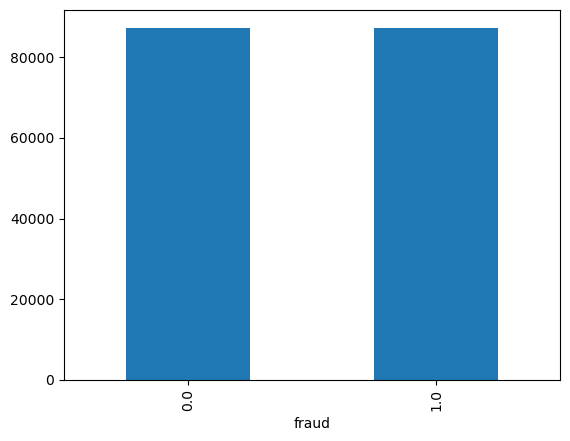

In [82]:
sample_plot = trainsample_under["fraud"].value_counts()
sample_plot.plot(kind="bar")
plt.show()

In [88]:
X_train_under = trainsample_under.drop(columns = ["fraud"])
y_train_under = trainsample_under["fraud"]


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_under, y_train_under)
log_reg_overfeed = log_reg.score(X_train_under, y_train_under)
log_reg_acc = log_reg.score(X_test, y_test)
log_reg_pred = log_reg.predict(X_test)
log_reg_rec_prec = classification_report(y_pred = log_reg_pred, y_true = y_test)
print("Overfeed:",log_reg_overfeed, "Accuracy:", log_reg_acc, "Difference: ",log_reg_overfeed-log_reg_acc, "\n", log_reg_rec_prec)
print("The model shows very little difference from the module using oversampling, slight improvement on difference between test and train scores.")

Overfeed: 0.9408315504044483 Accuracy: 0.934228 Difference:  0.006603550404448377 
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228232
         1.0       0.57      0.95      0.71     21768

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

The model shows very little difference from the module using oversampling, slight improvement on difference between test and train scores.


In [84]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [85]:
sm = SMOTE(random_state = 1, sampling_strategy=1.0)
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)
print(y_train.value_counts())
print(y_train_sm.value_counts())

fraud
0.0    684365
1.0     65635
Name: count, dtype: int64
fraud
0.0    684365
1.0    684365
Name: count, dtype: int64


In [89]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)
log_reg_overfeed = log_reg.score(X_train_sm, y_train_sm)
log_reg_acc = log_reg.score(X_test, y_test)
log_reg_pred = log_reg.predict(X_test)
log_reg_rec_prec = classification_report(y_pred = log_reg_pred, y_true = y_test)
print("Overfeed:",log_reg_overfeed, "Accuracy:", log_reg_acc, "Difference: ",log_reg_overfeed-log_reg_acc, "\n", log_reg_rec_prec)
print("SMOTE sampling method is not advisable for this set of data as accuracy greatly decreases.")

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Overfeed: 0.941439144316264 Accuracy: 0.096204 Difference:  0.845235144316264 
               precision    recall  f1-score   support

         0.0       1.00      0.01      0.02    228232
         1.0       0.09      1.00      0.16     21768

    accuracy                           0.10    250000
   macro avg       0.54      0.51      0.09    250000
weighted avg       0.92      0.10      0.03    250000

SMOTE sampling method is not advisable for this set of data as accuracy greatly decreases.
